**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
  - [Description](#toc1_1_)    
  - [Conclusion](#toc1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Introduction](#toc0_)

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition, data was collected using a web platform with a survey where anonymous users answered each question.

The data and description was obteined from __[Kagle](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data)__

## <a id='toc1_1_'></a>[Description](#toc0_)

In [152]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
# Reading CSV File
df = pd.read_csv('C:/Users/jfcom/Documents/Git_repository/Obesity_or_CVD_risk/dataset/ObesityDataSet.csv')

# Viewing data
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


The description of our caracteristics are:

The attributes related with eating habits: 
* `FAVC`: Frequent consumption of high caloric food 
* `FCVC`: Frequency of consumption of vegetables 
* `NCP`: Number of main meals 
* `CAEC`: Consumption of food between meals 
* `CH20`: Consumption of water daily 
* `CALC`: Consumption of alcohol 

The attributes related with the physical condition: 
* `SCC`: Calories consumption monitoring 
* `FAF`: Physical activity frequency 
* `TUE`: Time using technology devices 
* `MTRANS`: Transportation used

variables obtained :
* `Gender`
* `Age`
* `Heigth`
* `Weight`
* `Smoke`
* `family_history_with_overweight`

NObesity values(our target):

* Underweight Less than 18.5
* Normal 18.5 to 24.9
* Overweight 25.0 to 29.9
* Obesity I 30.0 to 34.9
* Obesity II 35.0 to 39.9
* Obesity III Higher than 40


In [154]:
# df Summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [155]:
# Numeric summary statistics
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [156]:
# Categorical summary statistics
df.describe(include='O')

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1401,1866,2015,2067,1726,1765,1580,351


In [157]:
# Null and duplicated data
print("Null values:{}\nDuplicates values:{}".format(df.isna().any().sum(),df.duplicated().sum()))

Null values:0
Duplicates values:24


The column `Age` is float type, we will change for an integer type, and transform to lowercase the columns names only for ease of handling

In [158]:
# Changing to lowercase columns name
df.columns = df.columns.str.lower()

# Transforming Age into int Type
df['age'] = df['age'].astype('int')

# Data visualizing
df

,age,gender,height,weight,calc,favc,fcvc,ncp,scc,smoke,ch2o,family_history_with_overweight,faf,tue,caec,mtrans,nobeyesdad
0,21,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## <a id='toc1_2_'></a>[Conclusion](#toc0_)

The dataset contains 2111 records with 17 columns, there aren't Null values and there are 24 duplicate values but we don´t have a calumn that specify a unique ID, therefore is possible have similar information, thence we won´t drop duplicates values.

Most of the people in our dataset have Obesity type 1, consume of high calorie food and have a family history with overweight

# EDA

In [159]:
# Setting background chart
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [160]:
# Separate into numerical and categorical features
numerical_features = df.select_dtypes('float64').columns
categorical_features =  df.select_dtypes('object').columns

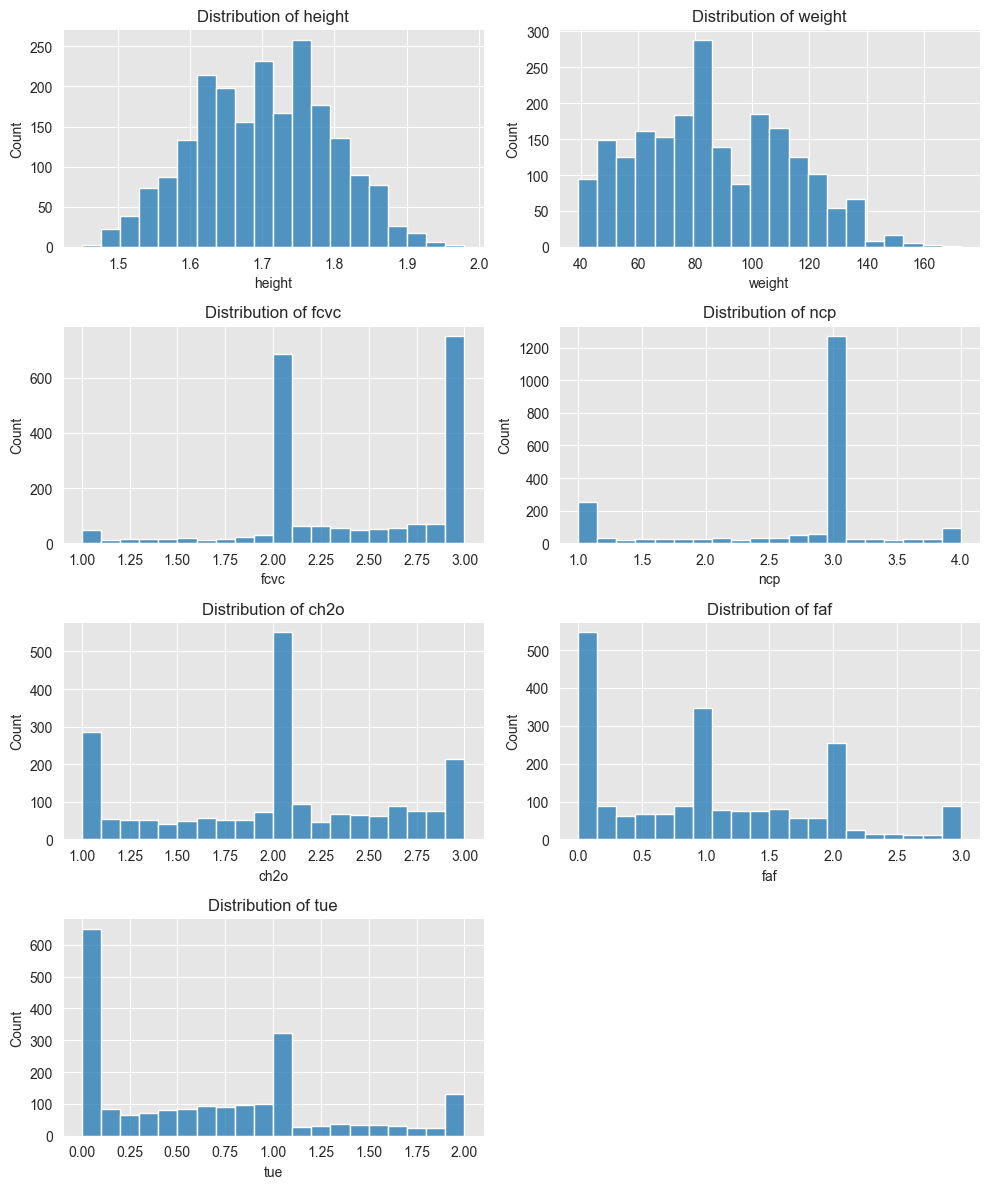

In [161]:
# Plot numerical featurea

plt.figure(figsize=(10,12))
for i, column in enumerate(numerical_features,1):
        plt.subplot(4, 2, i)
        sns.histplot(df, x=column, bins=20)
        plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


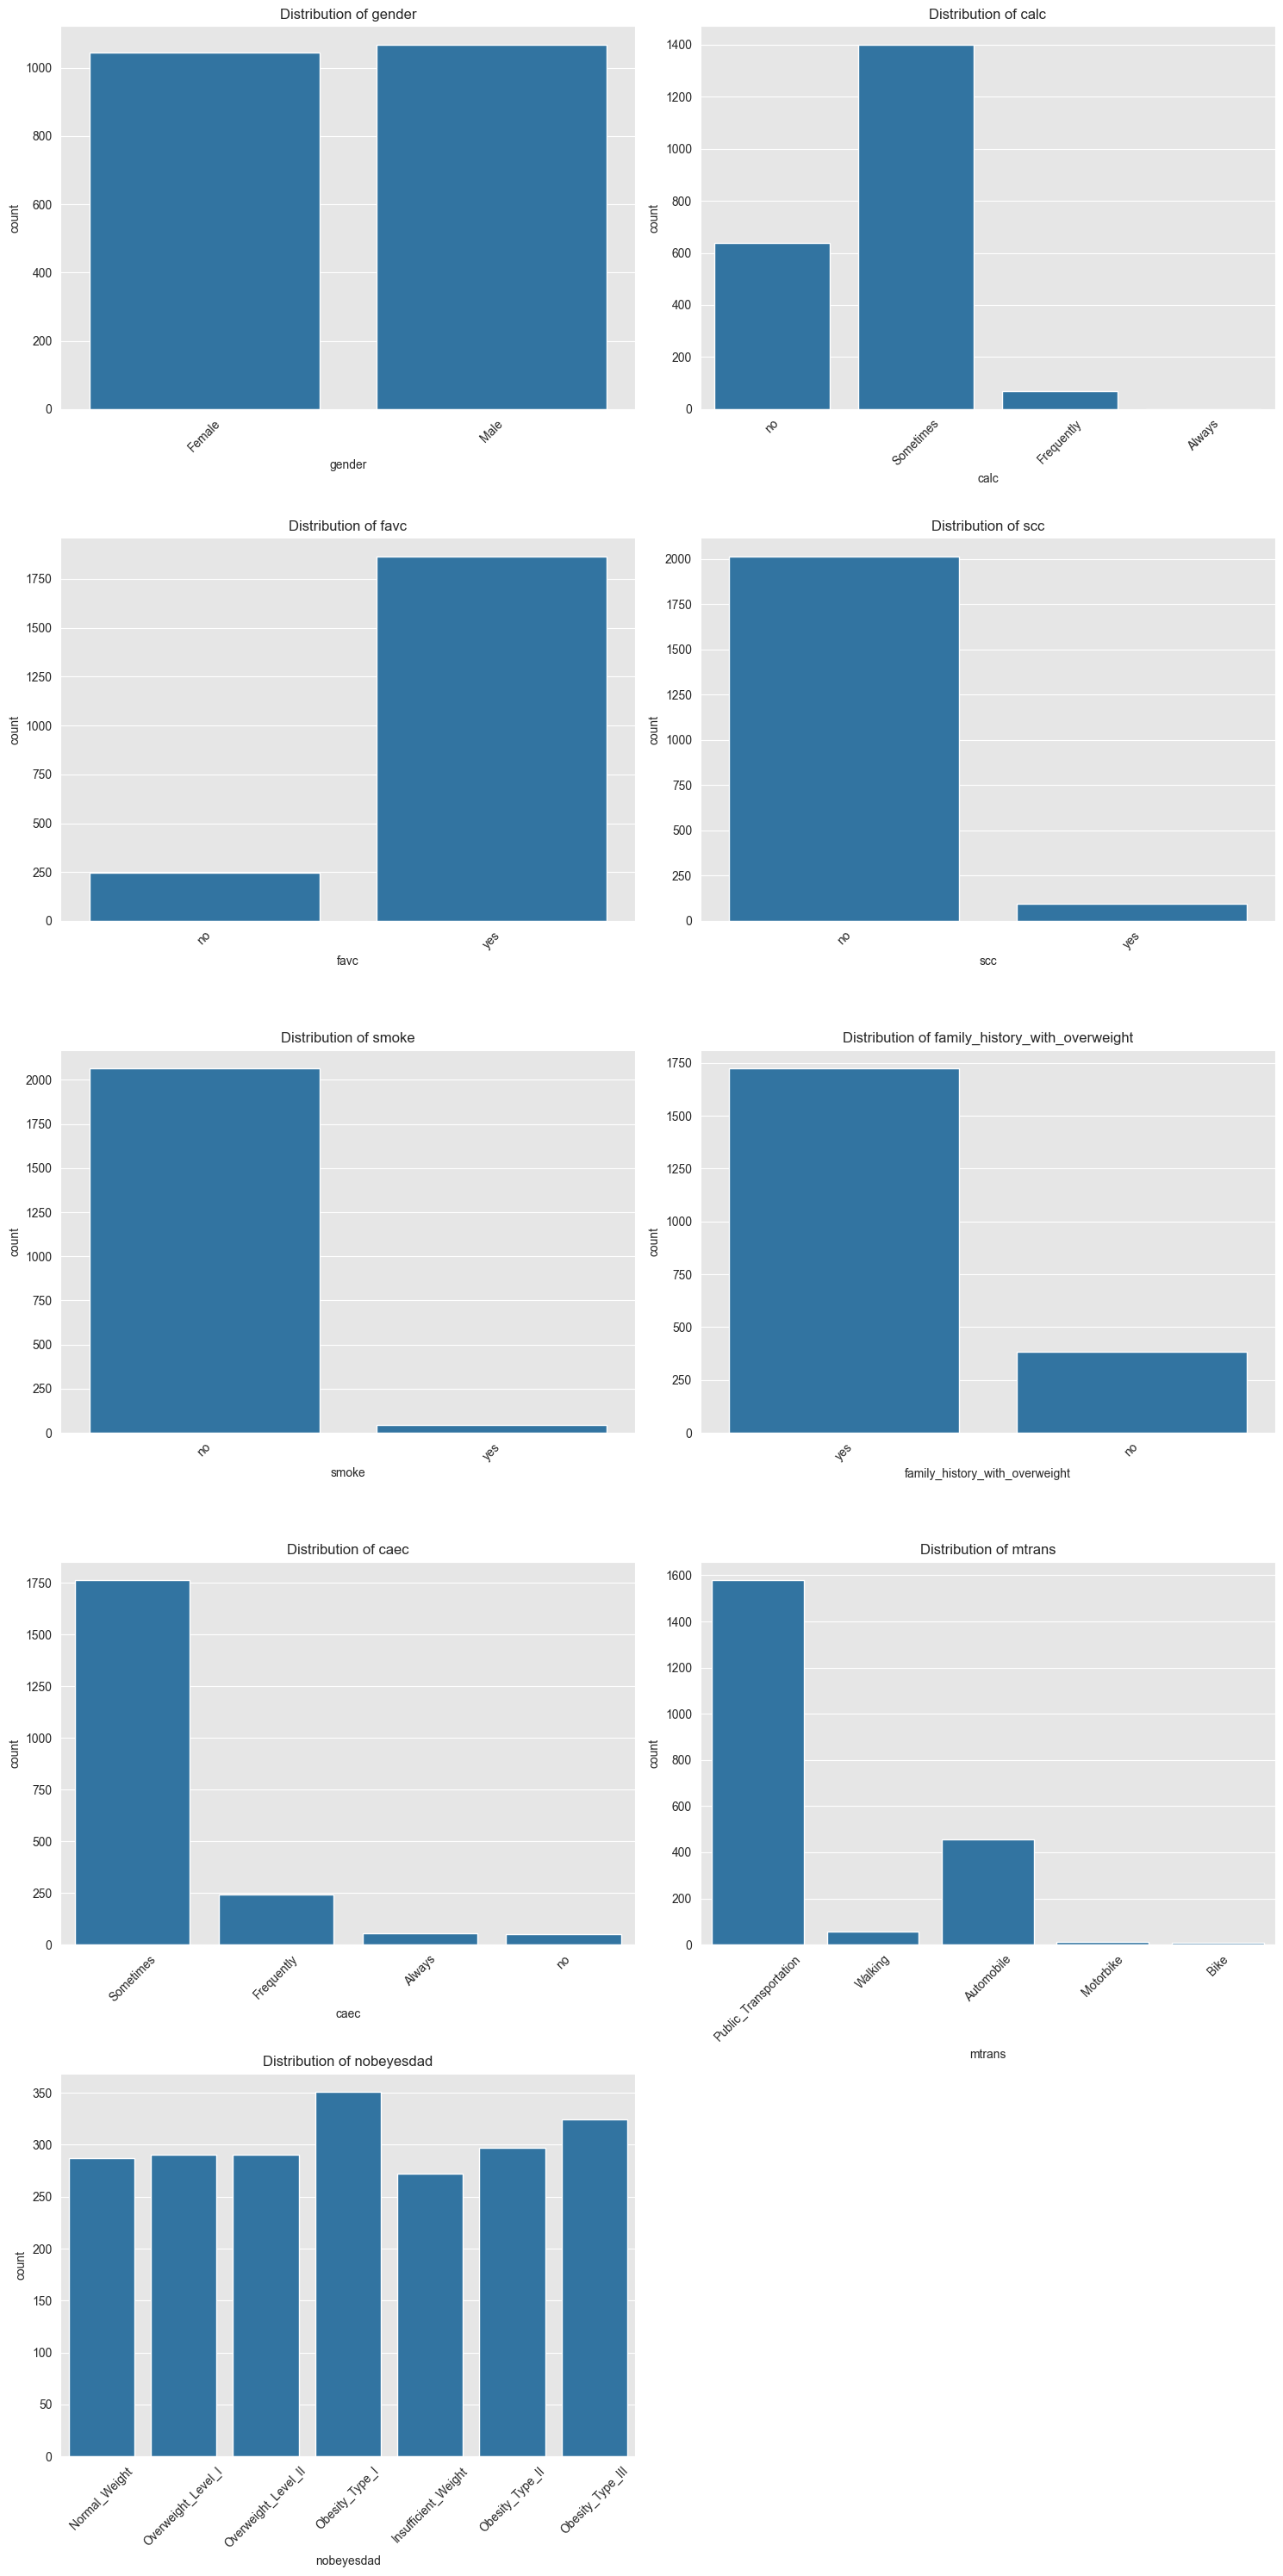

In [162]:
# Plot categorical features

plt.figure(figsize=(15,30))
for i, column in enumerate(categorical_features,1):
        plt.subplot(5, 2, i)
        sns.countplot(df, x=column)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We can observe that the obesity type I is the most frequently, and the first trhee places are related with obesity I, II and III. Meanwhile people whose have normal weight are in penultimate place.


In [163]:
# Function to plot nobeyesdad vs another column
def obesity_chart(columns, title, axes):
    sns.barplot(df.groupby(['nobeyesdad',columns]).size().reset_index(),
            x='nobeyesdad', 
            y= 0, 
            hue=columns, 
            palette= 'Spectral',
            ax=axes
            )
    axes.set_title(title)
    axes.set_ylabel('Counts')
    return

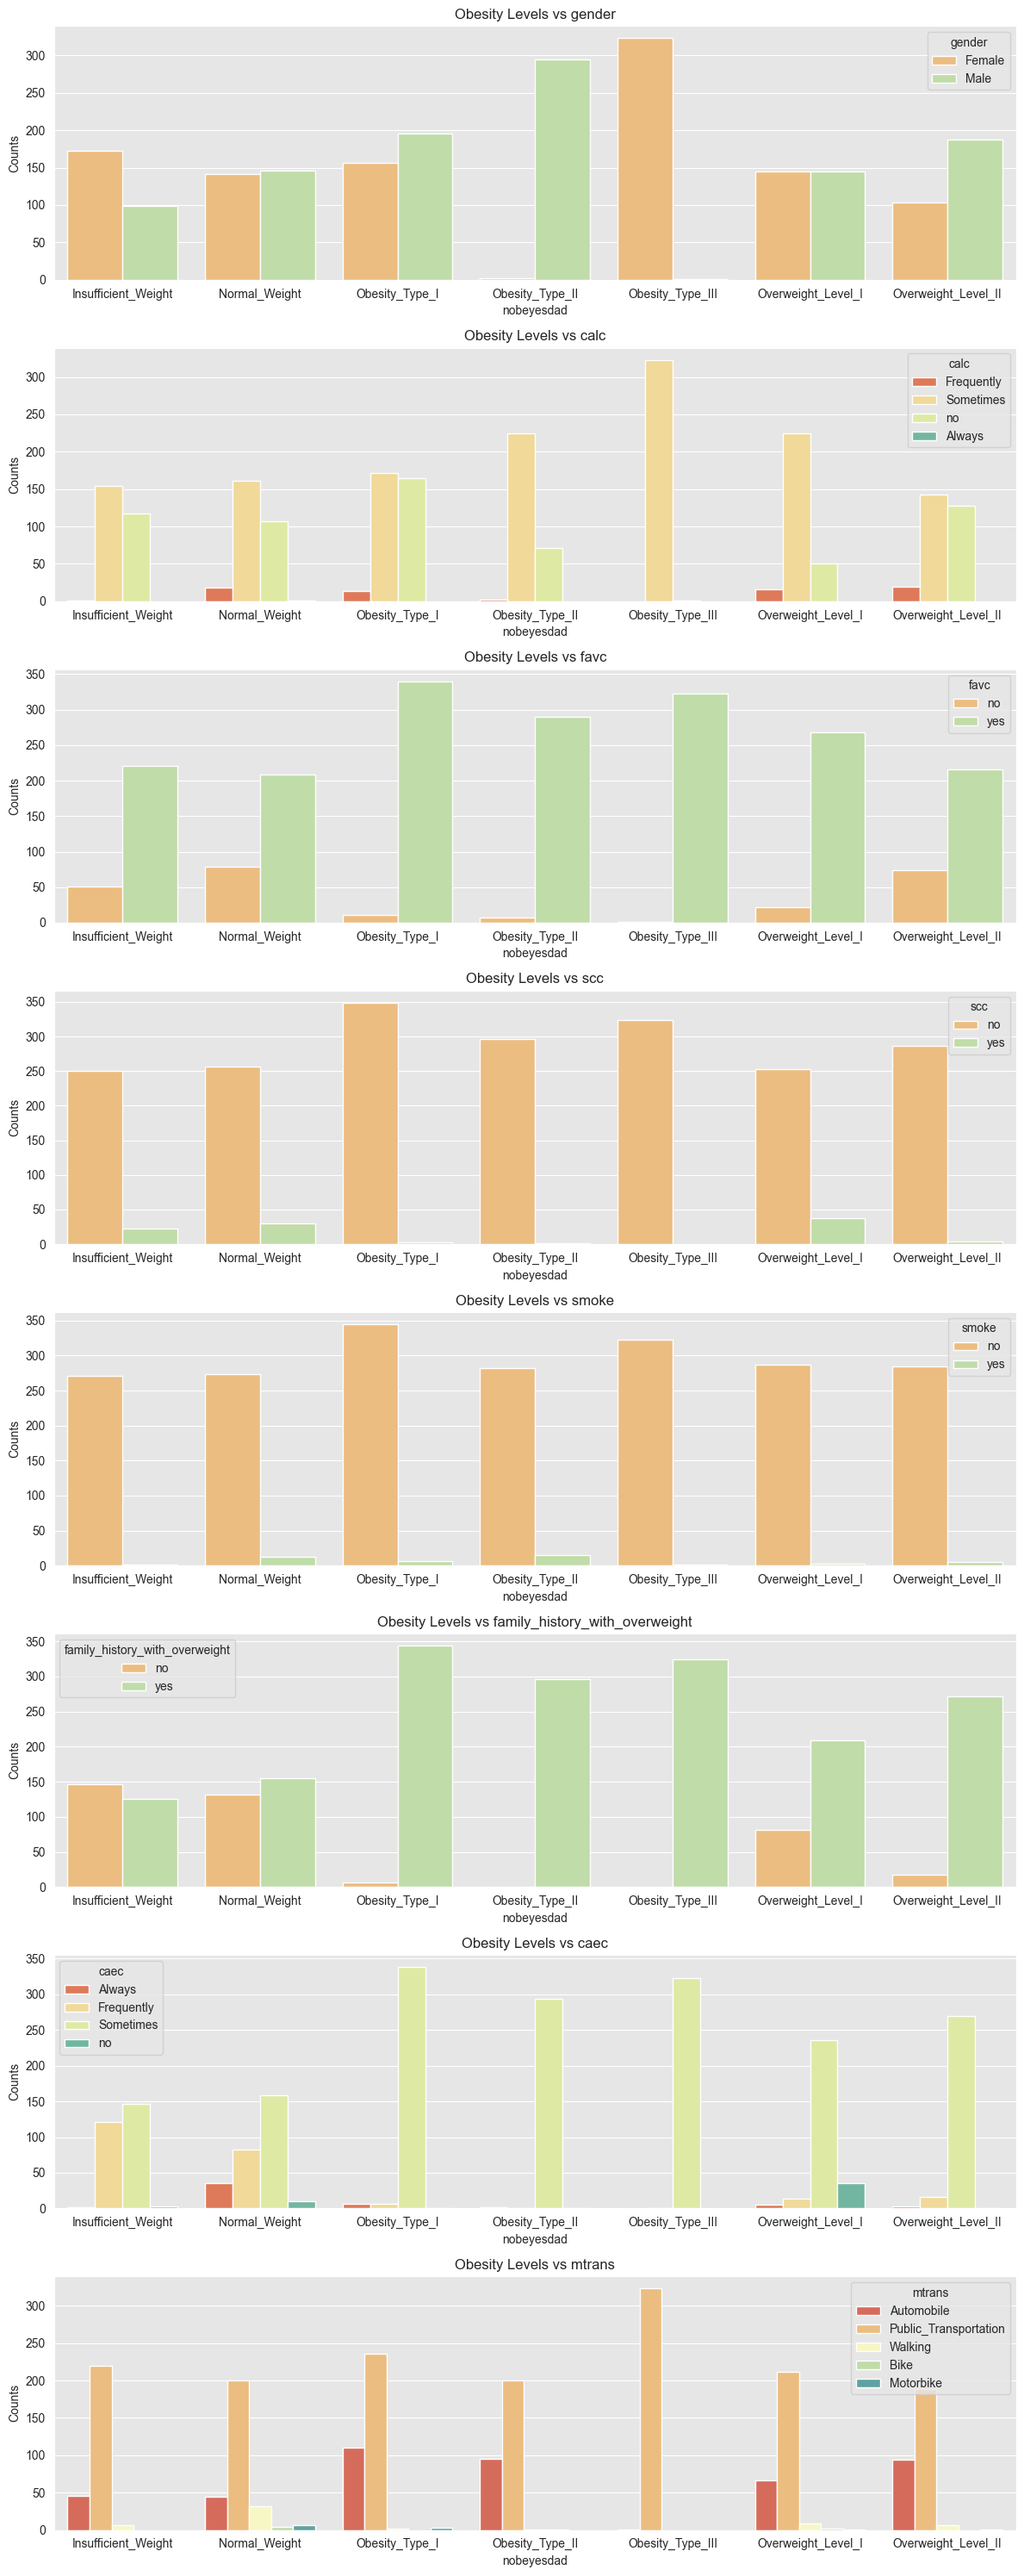

In [168]:
fig, ax = plt.subplots(nrows=len(categorical_features)-1, figsize=(12,30))

for i, col in enumerate(categorical_features.drop('nobeyesdad')):
    obesity_chart(col, f"Obesity Levels vs {col}", ax[i])


plt.tight_layout()
plt.show()

In the first plot (obesity vs gender) we noticed that Female has more prloblems with under weight, maybe they can be more affected with a perfect body which can cause bulimia disorders, by the other hand female stand out in obesity type III and tha men stand out in obesity type II. 
Without import the obesity level the most transportation used is public transportation, That a person smoke  or not, does not have influence in obesity levels, the people whos doesn't drink or sometimes drink have more propability to have an obesity level